In [1]:
import numpy as np
import crispr_assembler as ca
import matplotlib.pyplot as plt
import editdistance as ed
import os


%load_ext autoreload
%autoreload 2

In [2]:
def restore(path, minimum_occurences = 0):
    read = ca.Read(path)
    read.correct_errors(minimum_occurences = minimum_occurences)
    #gr = read.graph_from_pairs()

    return read#, gr

In [3]:
import pickle

In [4]:
path = '/home/anton/BigMac/skoltech/CRISPR_research/article/data/filtered/'
files = sorted(os.listdir(path))

In [5]:
files

['ES1.merged.assembled.fastq',
 'ES2.merged.assembled.fastq',
 'ES3.merged.assembled.fastq',
 'ES4.merged.assembled.fastq',
 'ES5.merged.assembled.fastq',
 'ES6.merged.assembled.fastq',
 'd24.merged.assembled.fastq',
 'd25.merged.assembled.fastq',
 'd26.merged.assembled.fastq',
 'd27.merged.assembled.fastq',
 'planA.merged.assembled.fastq',
 'sensivity.merged.assembled.fastq']

In [6]:
files = ['ES1.merged.assembled.fastq',
         'ES2.merged.assembled.fastq',
         'd24.merged.assembled.fastq',
         'd25.merged.assembled.fastq',
         'd26.merged.assembled.fastq',
         'd27.merged.assembled.fastq',
         'planA.merged.assembled.fastq',
         'sensivity.merged.assembled.fastq']


In [7]:
mask = np.array([1,1,0,0,0,0,1,1,1,1,1,1]).astype(bool)

In [8]:
reads = np.array(pickle.load(open("../../reads_all", 'rb')))[mask]

In [9]:
len(reads)

8

# Prepare answ

In [39]:
"../../data/answers/ES_answers_50"

'../../data/answers/ES_answers_50'

In [19]:
answer_sensivity = ca.read_arrays_with_tags("../../article/data/answers/sensivity", 0)

In [20]:
answer_sensivity.keys()

dict_keys(['first_2', 'first_3', 'first_5', 'first_7', 'first_8', 'first_11', 'first_14', 'first_15', 'first_21', 'first_22', 'second_2', 'second_3', 'second_5', 'second_7', 'second_8', 'second_11', 'second_14', 'second_15', 'second_21', 'second_22'])

In [21]:
first_old = pickle.load(open("./first_old_answers", 'rb'))
second_old = pickle.load(open("./second_old_answers", 'rb'))

In [23]:
reads[3]

In [31]:
a, d = ca.multiple_arrays_to_ids(first_old, reads[0].spacer_to_cluster_index)

100%|██████████| 14/14 [00:00<00:00, 56.57it/s]


In [32]:
d

{'1,11,14,15.1,19': [15, 15, 16, 12, 10, 14, 13, 13],
 31: [15, 15, 16, 12, 10, 14, 15, 14, 13, 12, 14, 15, 13, 15, 13, 14],
 '66, 3x,8,6n': [0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0],
 '5n,60x': [0, 0, 0, 0, 13, 16, 0, 0, 0, 0, 0],
 '15n,16n': [0, 0, 0, 0, 13, 16, 0, 0, 0, 0],
 3: [14, 14, 14, 14, 15, 12, 11],
 '2,3n,13,20,22,24,60,61,62,68': [13, 13, 14, 13],
 12: [15, 14, 15, 14],
 15: [15, 14, 14, 14, 14, 15, 13, 13, 14, 15, 14, 13, 14, 14, 13],
 27: [15, 14, 14, 15, 13, 14, 14, 14, 13, 13, 13, 15, 15, 15],
 67: [15, 14, 14, 14, 15, 14, 13],
 7: [12, 13, 14, 15, 15, 14, 15, 16, 12],
 '9,21,23,65,70': [16, 14, 15, 14, 15, 14, 14, 15, 15, 14],
 75: [14, 15, 13, 14, 13, 12, 12]}

In [33]:
a

{'1,11,14,15.1,19': [5, 3, 1, 0, 8, 21, 6, 14],
 31: [5, 3, 1, 0, 8, 21, 17, 4, 6, 3, 4, 7, 14, 16, 3, 2],
 '66, 3x,8,6n': [15, 2, 7, 3, 12, 13, 17, 8, 16, 11, 9, 18],
 '5n,60x': [15, 2, 7, 14, 7, 3, 12, 13, 17, 8, 16],
 '15n,16n': [15, 2, 7, 14, 7, 3, 16, 11, 9, 18],
 3: [12, 19, 12, 18, 5, 4, 20],
 '2,3n,13,20,22,24,60,61,62,68': [1, 11, 12, 20],
 12: [16, 12, 11, 14],
 15: [16, 7, 7, 14, 6, 14, 16, 5, 4, 10, 8, 0, 3, 8, 13],
 27: [16, 7, 7, 14, 16, 3, 8, 13, 8, 10, 7, 2, 0, 15],
 67: [16, 7, 7, 6, 14, 8, 0],
 7: [0, 6, 19, 5, 6, 4, 17, 1, 16],
 '9,21,23,65,70': [17, 12, 4, 2, 6, 0, 3, 17, 5, 4],
 75: [1, 0, 10, 15, 18, 6, 18]}

In [37]:
a, d = ca.multiple_arrays_to_ids(second_old, reads[0].spacer_to_cluster_index)

100%|██████████| 13/13 [00:00<00:00, 61.80it/s]


In [38]:
d

{'1,11,14,15.1,19': [12, 14, 13, 14, 15, 15, 14, 13, 12, 14, 14, 13, 12, 12],
 31: [15, 14, 15, 13, 14, 15, 14, 15, 13, 13, 14, 14, 13],
 '66, 3x,8,6n': [0, 0, 0, 0, 1, 0],
 '5n,60x': [0, 0, 0, 0, 2, 0],
 3: [15, 15, 14, 13, 12, 14, 13, 14],
 '2,3n,13,20,22,24,60,61,62,68': [14, 12, 15, 15, 14, 15, 14, 14, 14],
 12: [14, 14, 15, 14, 13],
 15: [14, 14, 14, 14, 14, 14],
 27: [14, 13, 14, 15, 15, 14, 13, 12, 14, 14, 13, 12, 12],
 67: [14, 14, 15, 14, 13],
 7: [15, 14, 15, 15, 14, 16, 14],
 '9,21,23,65,70': [15, 0, 14, 13, 14, 13, 15, 13, 13],
 75: [16, 12, 13, 14, 15, 13, 14, 14, 14, 14, 16, 13]}

## sample exps

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
a = np.random.normal(100, 19, 10)
b = np.random.normal(1000, 50, 10)

In [20]:
c = np.zeros(15)
c[:10] = a
c[5:] += b

<Container object of 15 artists>

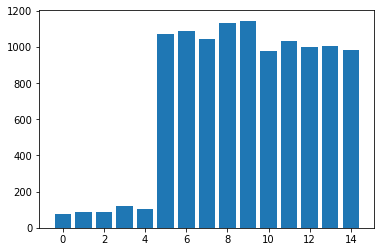

In [38]:
plt.bar(np.arange(15), c)

In [22]:
np.mean(a)

92.85976394703764

In [23]:
np.mean(b)

1002.9877960303845

In [52]:
i = 10
j = 5

In [53]:
A = [[i, j], [15 - i, 15 - j]]

In [54]:
B = [sum(c[:i]), sum(c[j:])]

In [55]:
np.dot(np.linalg.inv(A), B)

array([  95.46542805, 1000.5030932 ])